In [90]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

### Cargamos los datos

In [91]:
df = pd.read_csv('/workspace/dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


La dimensionalidad es muy alta, hay 81 columnas

### Exploración y limpieza de datos

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [93]:
cols_with_nas=[]
for col in df.columns:
    nas = df[col].isna().sum()
    if nas!=0:
        cols_with_nas.append(col)
        print(f'Column {col} of type {df[col].dtypes} has {nas} missing values')
        

Column LotFrontage of type float64 has 259 missing values
Column Alley of type object has 1369 missing values
Column MasVnrType of type object has 872 missing values
Column MasVnrArea of type float64 has 8 missing values
Column BsmtQual of type object has 37 missing values
Column BsmtCond of type object has 37 missing values
Column BsmtExposure of type object has 38 missing values
Column BsmtFinType1 of type object has 37 missing values
Column BsmtFinType2 of type object has 38 missing values
Column Electrical of type object has 1 missing values
Column FireplaceQu of type object has 690 missing values
Column GarageType of type object has 81 missing values
Column GarageYrBlt of type float64 has 81 missing values
Column GarageFinish of type object has 81 missing values
Column GarageQual of type object has 81 missing values
Column GarageCond of type object has 81 missing values
Column PoolQC of type object has 1453 missing values
Column Fence of type object has 1179 missing values
Column 

In [94]:
df[cols_with_nas].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


Vamos a ver también si hay filas que tengan valores faltantes para muchas de las columnas:

In [95]:
# Contar el número de valores faltantes por fila
missing_values_per_row = df.isna().sum(axis=1)

# Mostrar el resultado
max(missing_values_per_row)

16

El total de filas es de 1460, y vamos a tenerlo en cuenta porque si muchas de esas filas continen un valor faltante para una columna, será mejor eliminar la columna porque una imputación podría conllevar introducir información falsa.


Vamos a eliminar las variables: LotFrontage, Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature.      

In [96]:
df = df.drop(['Id', 'LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [97]:
cols_with_nas_cat=[]
cols_with_nas_num=[]
for col in df.columns:
    nas = df[col].isna().sum()
    if nas!=0:
        [cols_with_nas_cat.append(col) if df[col].dtypes=='object' else cols_with_nas_num.append(col)]
        print(f'Column {col} of type {df[col].dtypes} has {nas} missing values')
        

Column MasVnrArea of type float64 has 8 missing values
Column BsmtQual of type object has 37 missing values
Column BsmtCond of type object has 37 missing values
Column BsmtExposure of type object has 38 missing values
Column BsmtFinType1 of type object has 37 missing values
Column BsmtFinType2 of type object has 38 missing values
Column Electrical of type object has 1 missing values
Column GarageType of type object has 81 missing values
Column GarageYrBlt of type float64 has 81 missing values
Column GarageFinish of type object has 81 missing values
Column GarageQual of type object has 81 missing values
Column GarageCond of type object has 81 missing values


In [98]:
df[cols_with_nas_cat].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA
2,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
3,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA
4,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


Vamos a deshacernos de los valores faltantes. En las variables categóricas, los sustituímos por la moda, y en las numéricas por la mediana:

In [99]:
df[cols_with_nas_num] = df[cols_with_nas_num].apply(lambda x: x.fillna(x.median()))
df[cols_with_nas_cat] = df[cols_with_nas_cat].apply(lambda x: x.fillna(x.mode()[0]))

Ahora vamos a codificar las variables categóricas usando dummy encoding:

In [100]:
cols_cat = [col for col in df.columns if df[col].dtype=='object']
len(cols_cat)

37

In [101]:
dummy_df = pd.get_dummies(df, columns=cols_cat, dtype='int')
dummy_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Normalización de los datos

In [102]:
scaler = StandardScaler()
numeric_cols = [col for col in df.columns if col not in cols_cat]
dummy_df[numeric_cols] = scaler.fit_transform(dummy_df[numeric_cols])

In [103]:
dummy_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0


### Aplicación de PCA

In [104]:
pca = PCA(n_components=30)
pca.fit(dummy_df)


PCA(n_components=30)

Veamos ahora un gráfico que contiene un gráfico de barras para mostrar cada componente y la varianza que explica y una línea que muetra la varianza acumulada:

In [105]:
pca.components_

array([[-0.00587175,  0.0781964 ,  0.27888889, ..., -0.00112142,
        -0.02297967,  0.03537782],
       [ 0.15630848, -0.01014721,  0.01222873, ...,  0.00147669,
         0.00783271, -0.01280128],
       [-0.16847811,  0.25978218, -0.03716853, ...,  0.00234466,
         0.01534408, -0.02779827],
       ...,
       [ 0.18280188, -0.04135504,  0.02322662, ...,  0.00448584,
        -0.12199249,  0.09158304],
       [-0.01774375, -0.04971377, -0.39701432, ...,  0.00399318,
         0.08313378, -0.05733074],
       [-0.06026023, -0.02531209, -0.12348549, ...,  0.00060976,
        -0.10350443,  0.08317001]])

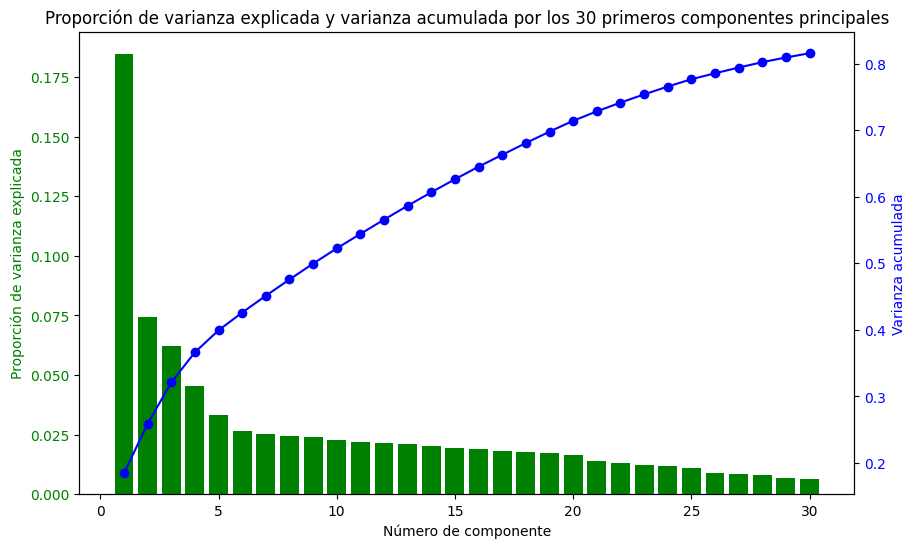

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes el resultado de PCA
# pca.explained_variance_ratio_ es un arreglo con la varianza explicada por cada componente

# Calcular la varianza acumulada
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Crear la figura y el primer eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la varianza explicada por cada componente
ax1.bar(range(1, 31), pca.explained_variance_ratio_, color='green', label='Varianza explicada por componente')
ax1.set_xlabel('Número de componente')
ax1.set_ylabel('Proporción de varianza explicada', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('Proporción de varianza explicada y varianza acumulada por los 30 primeros componentes principales')

# Crear un segundo eje para graficar la varianza acumulada
ax2 = ax1.twinx()
ax2.plot(range(1, 31), cum_variance, marker='o', color='blue', label='Varianza acumulada')
ax2.set_ylabel('Varianza acumulada', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Mostrar el gráfico
plt.show()


Calculamos la varianza explicada acumulada por los 30 primeros componentes:

In [124]:
var = np.cumsum(pca.explained_variance_ratio_)[-1]
print(f'Varianza acumulada por 30 primeros componentes: {100*round(var, 3)}%')

Varianza acumulada por 30 primeros componentes: 81.6%


### Interpretación

Los 30 primeros componentes captura el 81.6% de la varianza en los datos. Este porcentaje muestra que la dimensionalidad ha sido efectiva ya que hemos reducido el número de variables de 266 a 30 sin perder mucha información.